<a href="https://colab.research.google.com/github/Tima1117/Visualization_Google_collab/blob/main/Data_Visualisation_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# They see me rolling

In [35]:
# Этап 0 - подключаем файл из драйва + очистка старых сеансов

## Какая-то странная история, с компа удаляется, с гита не работает...

### Важно запускать перед каждым сеансом!!!

# Сброс всех переменных
# %reset -f

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file_path = '/content/drive/MyDrive/A_main/Управление разработкой/САВ Проект 2 Данные.xlsx'
df = pd.read_excel(file_path)
numeric_cols = ['Сила', 'Ловкость', 'Выносливость', 'Интеллект', 'Мудрость', 'Харизма']

# Провекряем...
import os
if os.path.exists(file_path):
    print("Файл найден")
else:
    print("Файл не найден!!! XXX")

Mounted at /content/drive
Файл найден


In [36]:
# Этап 1 - Добавляем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, chi2_contingency, f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Настройка графиков
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("ок")

ок


Размер таблички: 5000 строк, 15 столбцов

Столбцы: ['Имя', 'Предмет', 'Сила', 'Ловкость', 'Выносливость', 'Интеллект', 'Мудрость', 'Харизма', 'Легкие доспехи', 'Средние доспехи', 'Тяжелые доспехи', 'Щиты', 'Простое оружие', 'Воинское оружие', 'Фокусировки']

Первые 5 строк:


,Имя,Предмет,Сила,Ловкость,Выносливость,Интеллект,Мудрость,Харизма,Легкие доспехи,Средние доспехи,Тяжелые доспехи,Щиты,Простое оружие,Воинское оружие,Фокусировки
0,Йорейд Человеколюбивая,Короткий меч,14,14,14,10,10,10,1,1,1,1,1,1,0
1,Вестрлиди Ужасный,"Арбалет, легкий",10,10,16,10,16,10,1,1,0,1,1,0,1
2,Торфинна Неглупая,Молот,14,14,14,10,10,10,1,1,1,1,1,1,0
3,Хельга Рисковая,Дубинка,10,10,16,10,16,10,1,1,0,1,1,0,1
4,Асвёр Простодушная,Стеганый,14,14,14,10,10,10,1,1,1,1,1,1,0


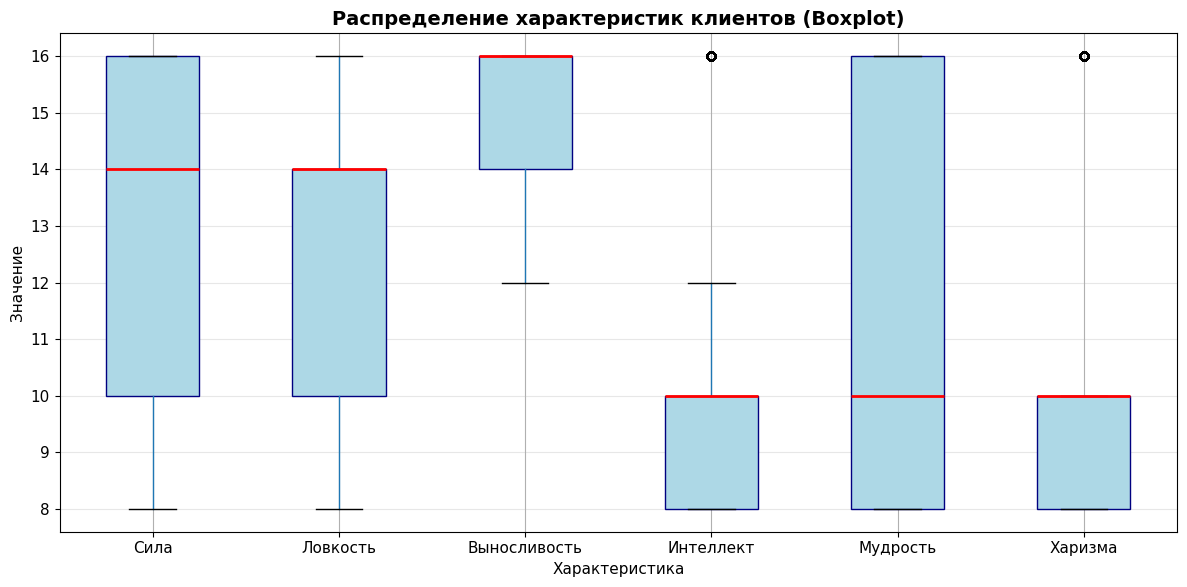

In [37]:
# Этап 2.1 - Читаем файлик

df = pd.read_excel('/content/drive/MyDrive/A_main/Управление разработкой/САВ Проект 2 Данные.xlsx')

print(f"Размер таблички: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"\nСтолбцы: {list(df.columns)}")
print(f"\nПервые 5 строк:")
display(df.head())

# ---

# Делаем график
fig, ax = plt.subplots(figsize=(12, 6))
df[numeric_cols].boxplot(ax=ax, patch_artist=True,
                          boxprops=dict(facecolor='lightblue', color='navy'),
                          medianprops=dict(color='red', linewidth=2))
ax.set_title('Распределение характеристик клиентов (Boxplot)', fontweight='bold', fontsize=14)
ax.set_ylabel('Значение')
ax.set_xlabel('Характеристика')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Этап 2.2 - Выводы по описательной статистике:

| Характеристика | Среднее | Мин | Макс | Станд. откл. |
|----------------|---------|-----|------|--------------|
| Сила | 12.93 | 8 | 16 | 2.65 |
| Ловкость | 12.73 | 8 | 16 | 2.87 |
| Выносливость | 14.68 | 12 | 16 | 1.56 |
| Интеллект | 9.73 | 8 | 16 | 2.21 |
| Мудрость | 11.13 | 8 | 16 | 3.26 |
| Харизма | 10.81 | 8 | 16 | 3.08 |

**Выводы:**
- Выносливость -самая высокая и стабильная характеристика (среднее 14.68, σ=1.56)
- Интеллект — самый низкий показатель (среднее 9.73)
- Мудрость и Харизма имеют наибольший разброс (σ > 3)
- Пропущенных значений нет

📊 Статистика по характеристикам:


,Сила,Ловкость,Выносливость,Интеллект,Мудрость,Харизма
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,12.93,12.73,14.68,9.73,11.13,10.81
std,2.65,2.87,1.56,2.21,3.26,3.08
min,8.00,8.00,12.00,8.00,8.00,8.00
25%,10.00,10.00,14.00,8.00,8.00,8.00
50%,14.00,14.00,16.00,10.00,10.00,10.00
75%,16.00,14.00,16.00,10.00,16.00,10.00
max,16.00,16.00,16.00,16.00,16.00,16.00


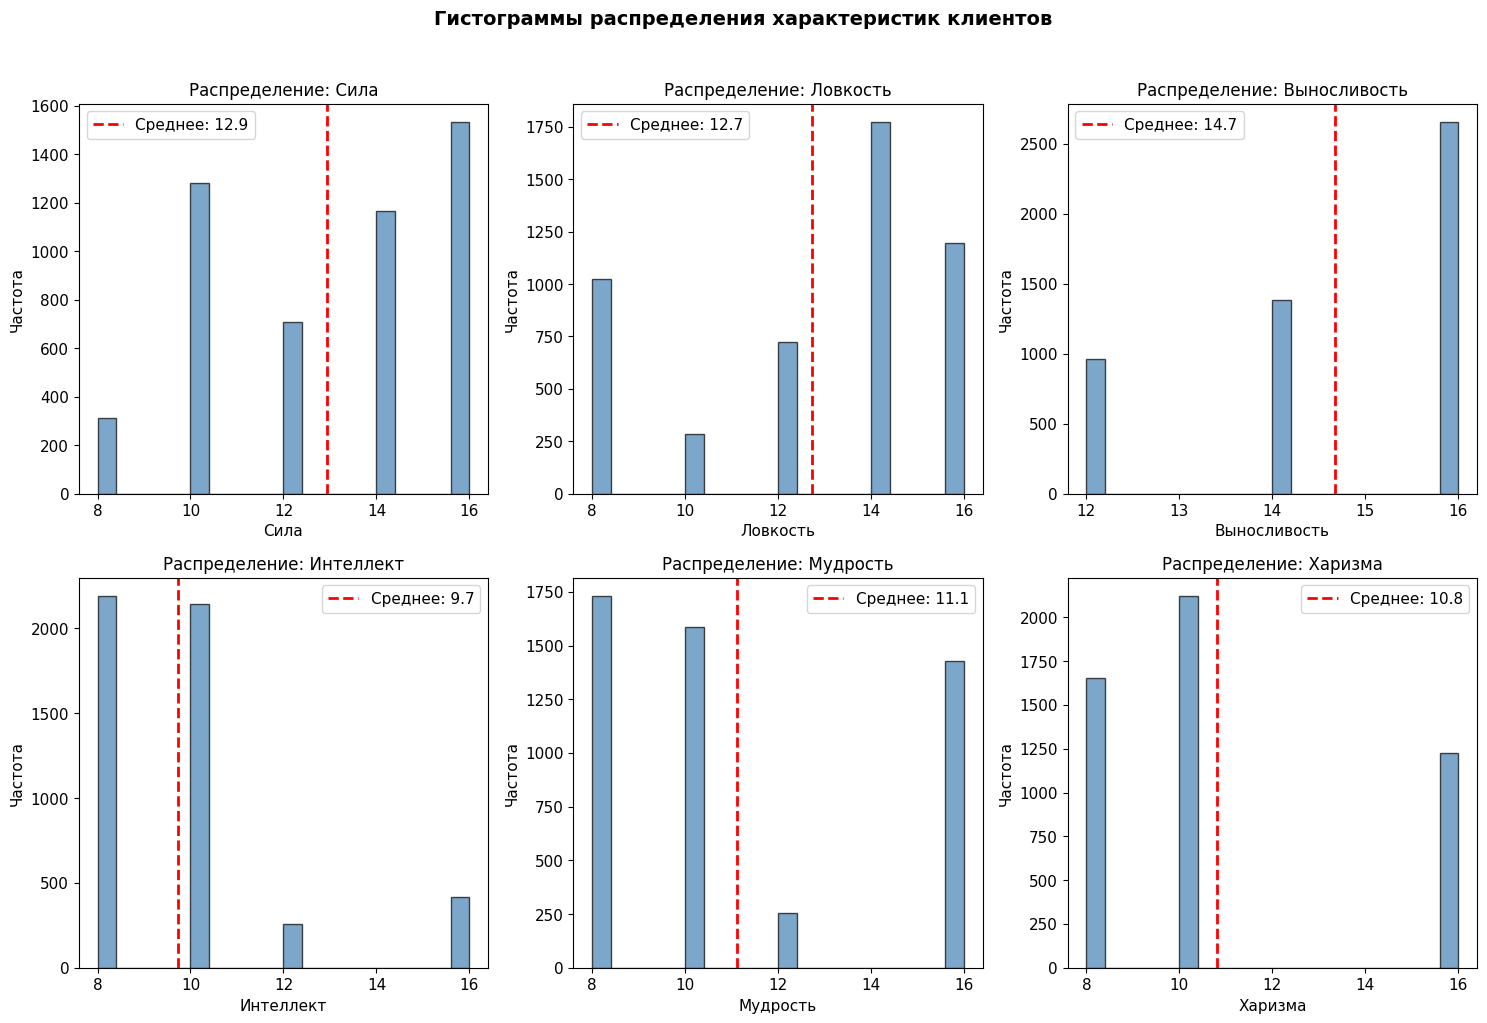

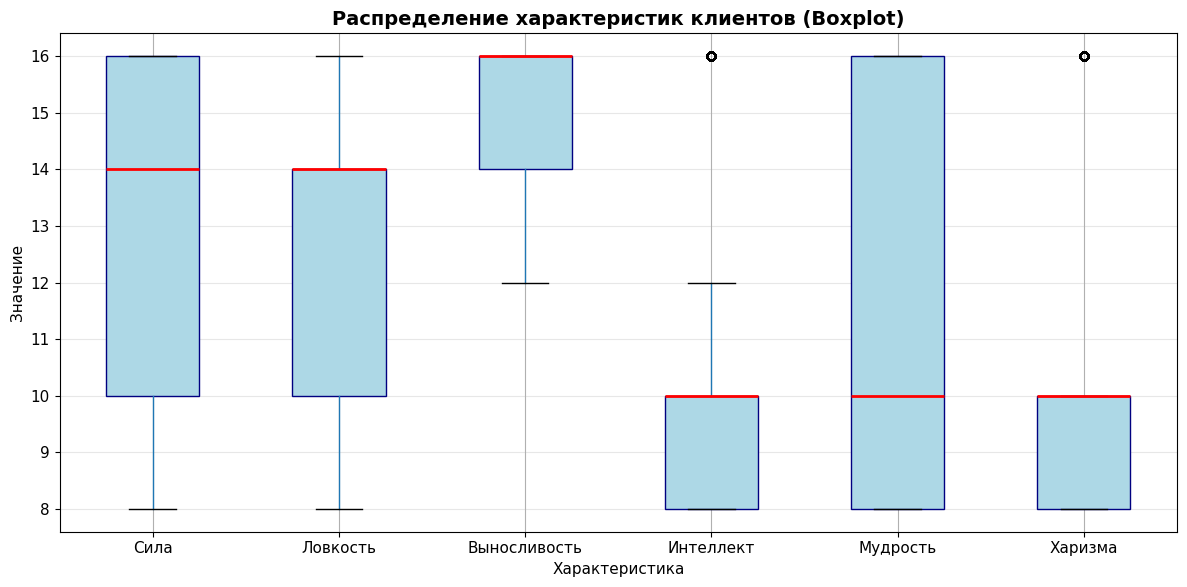

In [38]:
# Этап 3.1 - Статистика по характеристикам

print("📊 Статистика по характеристикам:")
display(df[numeric_cols].describe().round(2))

# Гистограммы распределения характеристик
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_title(f'Распределение: {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2,
                    label=f'Среднее: {df[col].mean():.1f}')
    axes[i].legend()

plt.suptitle('Гистограммы распределения характеристик клиентов', fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Boxplot характеристик
fig, ax = plt.subplots(figsize=(12, 6))
df[numeric_cols].boxplot(ax=ax, patch_artist=True,
                          boxprops=dict(facecolor='lightblue', color='navy'),
                          medianprops=dict(color='red', linewidth=2))
ax.set_title('Распределение характеристик клиентов (Boxplot)', fontweight='bold', fontsize=14)
ax.set_ylabel('Значение')
ax.set_xlabel('Характеристика')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# # Состряпал график +
# top10 = product_counts.head(10)
# other = product_counts[10:].sum()
# pie_data = pd.concat([top10, pd.Series({'Остальные (45 товаров)': other})])

# fig, ax = plt.subplots(figsize=(12, 10))
# colors = plt.cm.Set3(np.linspace(0, 1, len(pie_data)))
# ax.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', colors=colors, pctdistance=0.8)
# ax.set_title('Доля товаров в общих продажах (ТОП-10 + остальные)', fontweight='bold', fontsize=14)
# plt.tight_layout()
# plt.show()

### Этап 3.2 - Выводы по распределению характеристик:

| Характеристика | Среднее | Медиана | Станд. откл. | Мин | Макс |
|----------------|---------|---------|--------------|-----|------|
| Сила | 12.93 | 14 | 2.65 | 8 | 16 |
| Ловкость | 12.73 | 14 | 2.87 | 8 | 16 |
| Выносливость | 14.68 | 16 | 1.56 | 12 | 16 |
| Интеллект | 9.73 | 10 | 2.21 | 8 | 16 |
| Мудрость | 11.13 | 10 | 3.26 | 8 | 16 |
| Харизма | 10.81 | 10 | 3.08 | 8 | 16 |

**Ключевые наблюдения:**
- **Выносливость** — самая высокая и стабильная характеристика (среднее 14.68, σ=1.56), смещена вправо
- **Интеллект** — самый низкий показатель (среднее 9.73), бимодальное распределение с пиками на 8 и 10
- **Мудрость и Харизма** — наибольший разброс (σ > 3), три явных пика (8, 10, 16)
- **Сила и Ловкость** — широкий разброс с несколькими модами

**Вывод:** Наличие множественных мод в распределениях указывает на существование различных типов (кластеров) клиентов.

Уникальных товаров: 55


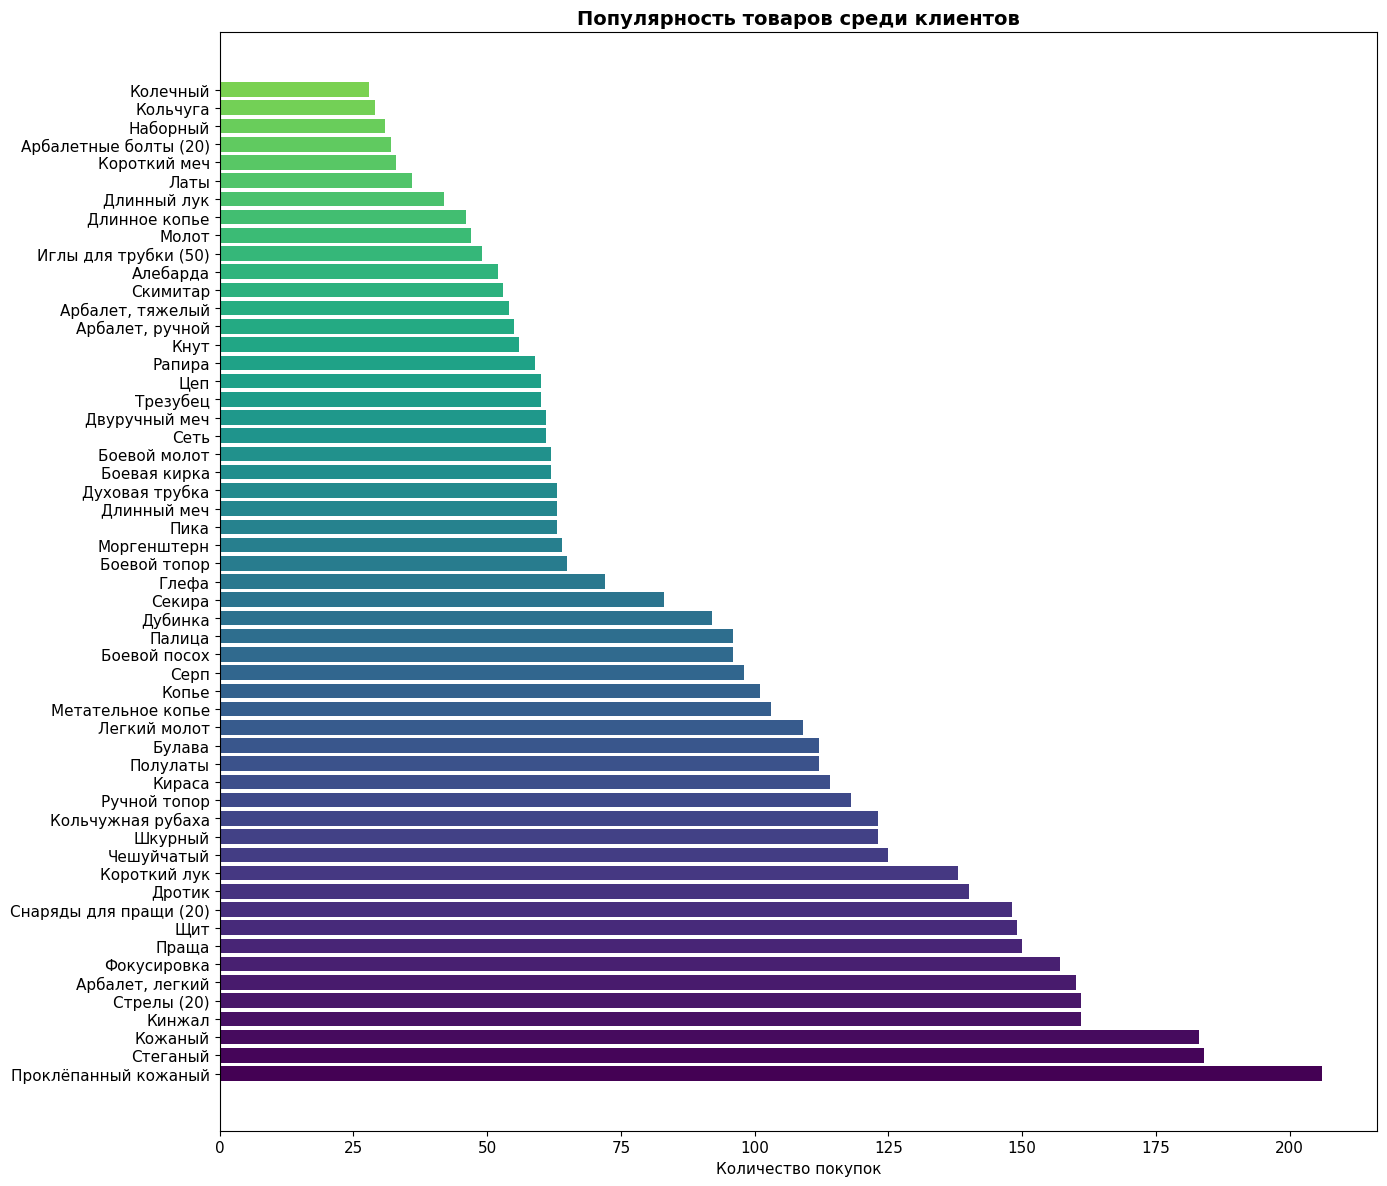


 ТОП-10 товаров:
  1. Проклёпанный кожаный: 206 (4.1%)
  2. Стеганый: 184 (3.7%)
  3. Кожаный: 183 (3.7%)
  4. Кинжал: 161 (3.2%)
  5. Стрелы (20): 161 (3.2%)
  6. Арбалет, легкий: 160 (3.2%)
  7. Фокусировка: 157 (3.1%)
  8. Праща: 150 (3.0%)
  9. Щит: 149 (3.0%)
  10. Снаряды для пращи (20): 148 (3.0%)


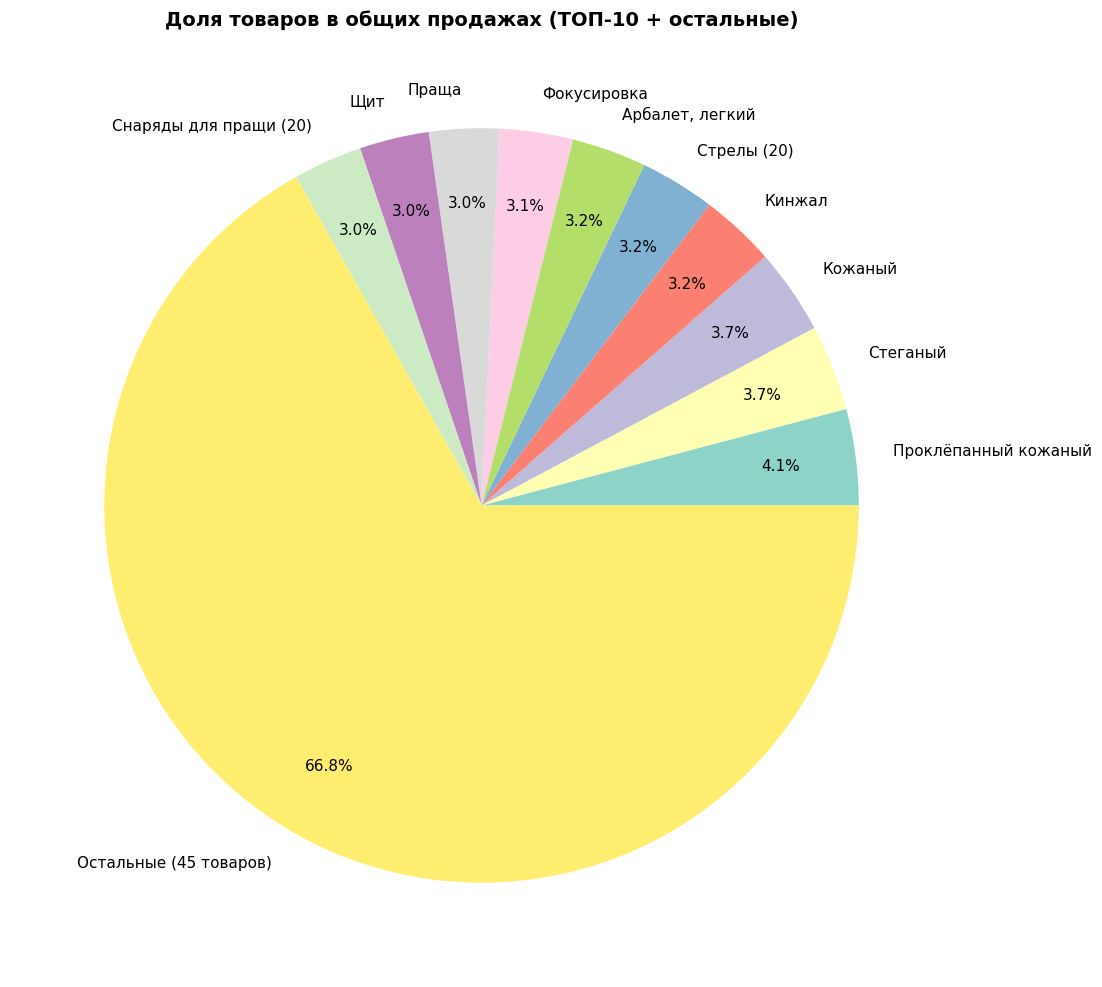

In [39]:
# Этап 4.1 Делаем графики популярности товаров

product_counts = df['Предмет'].value_counts()

print(f"Уникальных товаров: {df['Предмет'].nunique()}")

# График 1 - Bar chart популярности
fig, ax = plt.subplots(figsize=(14, 12))
colors = plt.cm.viridis(np.linspace(0, 0.8, len(product_counts)))
bars = ax.barh(product_counts.index, product_counts.values, color=colors)
ax.set_xlabel('Количество покупок')
ax.set_title('Популярность товаров среди клиентов', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print("\n ТОП-10 товаров:")
for i, (product, count) in enumerate(product_counts.head(10).items(), 1):
    print(f"  {i}. {product}: {count} ({count/len(df)*100:.1f}%)")

# График 2 - Pie chart ТОП-10
top10 = product_counts.head(10)
other = product_counts[10:].sum()
pie_data = pd.concat([top10, pd.Series({'Остальные (45 товаров)': other})])

fig, ax = plt.subplots(figsize=(12, 10))
colors = plt.cm.Set3(np.linspace(0, 1, len(pie_data)))
ax.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', colors=colors, pctdistance=0.8)
ax.set_title('Доля товаров в общих продажах (ТОП-10 + остальные)', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

### Этап 4.2 - Выводы по популярности товаров:

**ТОП-5 самых популярных товаров:**
| Ранг | Товар | Покупок | Доля |
|------|-------|---------|------|
| 1 | Проклёпанный кожаный | 206 | 4.1% |
| 2 | Стеганый | 184 | 3.7% |
| 3 | Кожаный | 183 | 3.7% |
| 4 | Кинжал | 161 | 3.2% |
| 5 | Стрелы (20) | 161 | 3.2% |

**Наименее популярные товары:**
- Колечный — 28 (0.6%)
- Кольчуга — 29 (0.6%)
- Наборный — 31 (0.6%)
- Латы — 36 (0.7%)

**Выводы:**
- Лёгкие доспехи (кожаные, стёганые, проклёпанные) — лидеры продаж (>11% рынка вместе)
- Простое оружие (кинжалы, стрелы, праща) популярнее воинского
- Тяжёлые доспехи (латы, кольчуга) наименее востребованы (<2% рынка)
- Распределение относительно равномерное — топ-товар занимает всего 4.1%
- Ассортимент широкий (55 товаров), но 45 из них дают менее 65% продаж

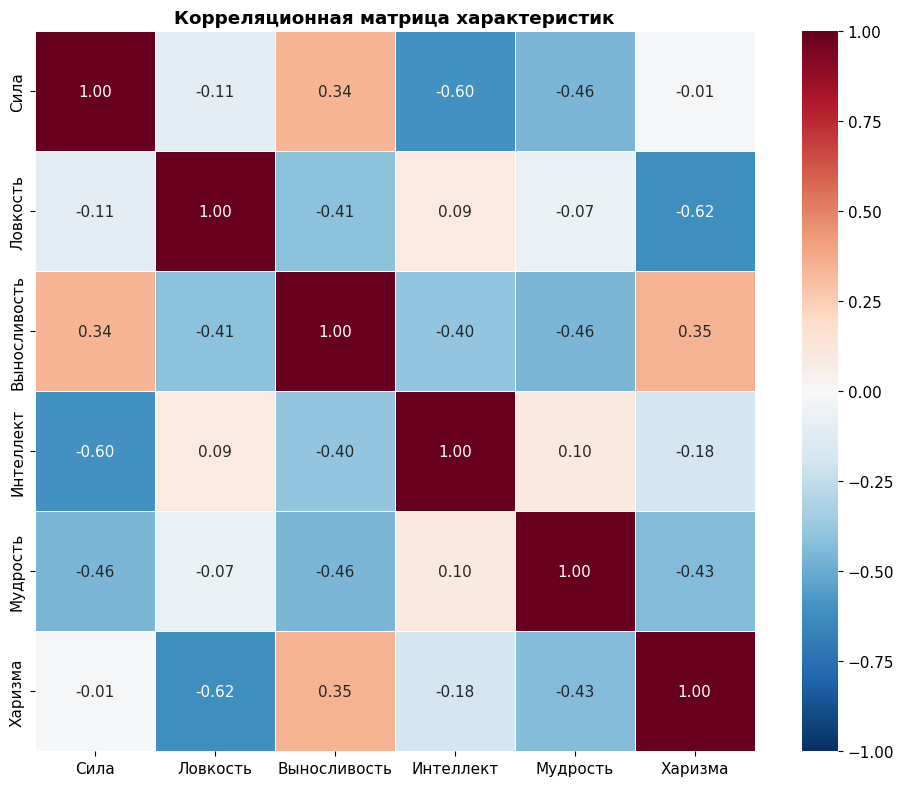


 Значимые корреляции:
  Сила ↔ Выносливость: r=0.339 (положит.)
  Сила ↔ Интеллект: r=-0.605 (отриц.)
  Сила ↔ Мудрость: r=-0.461 (отриц.)
  Ловкость ↔ Выносливость: r=-0.408 (отриц.)
  Ловкость ↔ Харизма: r=-0.622 (отриц.)
  Выносливость ↔ Интеллект: r=-0.396 (отриц.)
  Выносливость ↔ Мудрость: r=-0.457 (отриц.)
  Выносливость ↔ Харизма: r=0.349 (положит.)
  Мудрость ↔ Харизма: r=-0.435 (отриц.)


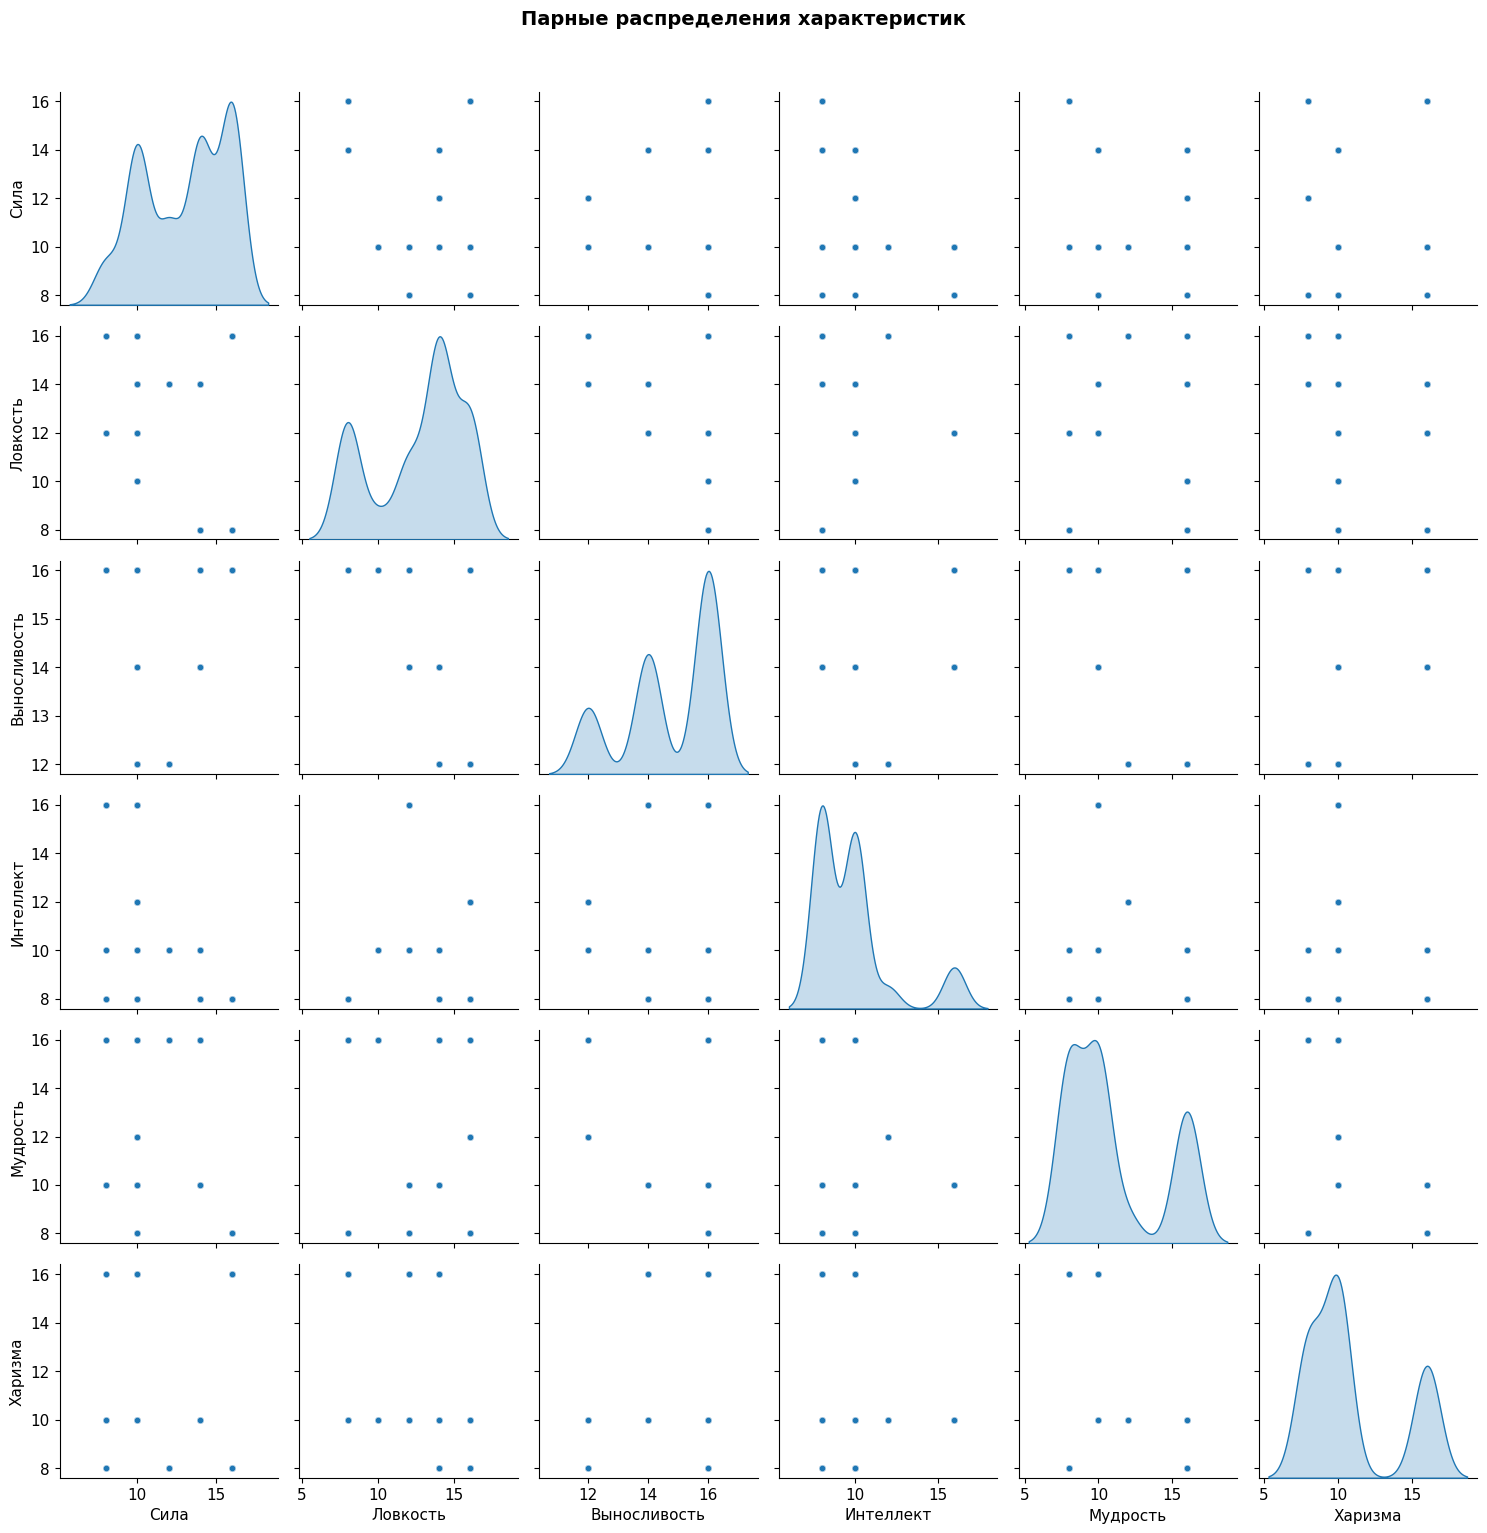

In [40]:
# Этап 5.1 - Корреляция

correlation_matrix = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            fmt='.2f', square=True, linewidths=0.5, vmin=-1, vmax=1)
ax.set_title('Корреляционная матрица характеристик', fontweight='bold')
plt.tight_layout()
plt.show()

print("\n Значимые корреляции:")
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        if i < j:
            corr, p = pearsonr(df[col1], df[col2])
            if abs(corr) > 0.3:
                print(f"  {col1} ↔ {col2}: r={corr:.3f} ({'положит.' if corr > 0 else 'отриц.'})")

# Еще распределение визаулизируем
sample_df = df.sample(min(500, len(df)), random_state=42)
g = sns.pairplot(sample_df[numeric_cols], diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'fill': True})
g.fig.suptitle('Парные распределения характеристик', y=1.02, fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

### Этап 5.2 - Выводы по корреляционному анализу:

**Сильные отрицательные корреляции (p < 0.001):**
| Пара | r | Интерпретация |
|------|---|---------------|
| Ловкость <> Харизма | -0.62 | Ловкие клиенты менее харизматичны |
| Сила <> Интеллект | -0.60 | Сильные клиенты менее интеллектуальны |
| Выносливость <> Мудрость | -0.46 | Выносливые клиенты менее мудры |
| Сила <> Мудрость | -0.46 | Сильные клиенты менее мудры |
| Мудрость <> Харизма | -0.44 | Мудрые клиенты менее харизматичны |

**Умеренные положительные корреляции:**
| Пара | r |
|------|---|
| Выносливость <> Харизма | 0.35 |
| Сила <> Выносливость | 0.34 |

**Вывод:** Характеристики образуют два противоположных "полюса":
- **Физический профиль:** Сила + Выносливость + Харизма
- **Ментальный профиль:** Интеллект + Мудрость + Ловкость

📈 ANOVA тест: Различия характеристик между товарами

H0: Средние характеристики одинаковы для всех товаров
H1: Есть значимые различия

  Сила: F=42.44, p=0.0000 →  Отвергаем H0
  Ловкость: F=18.06, p=0.0000 →  Отвергаем H0
  Выносливость: F=3.67, p=0.0000 →  Отвергаем H0
  Интеллект: F=9.66, p=0.0000 →  Отвергаем H0
  Мудрость: F=7.68, p=0.0000 →  Отвергаем H0
  Харизма: F=9.08, p=0.0000 →  Отвергаем H0


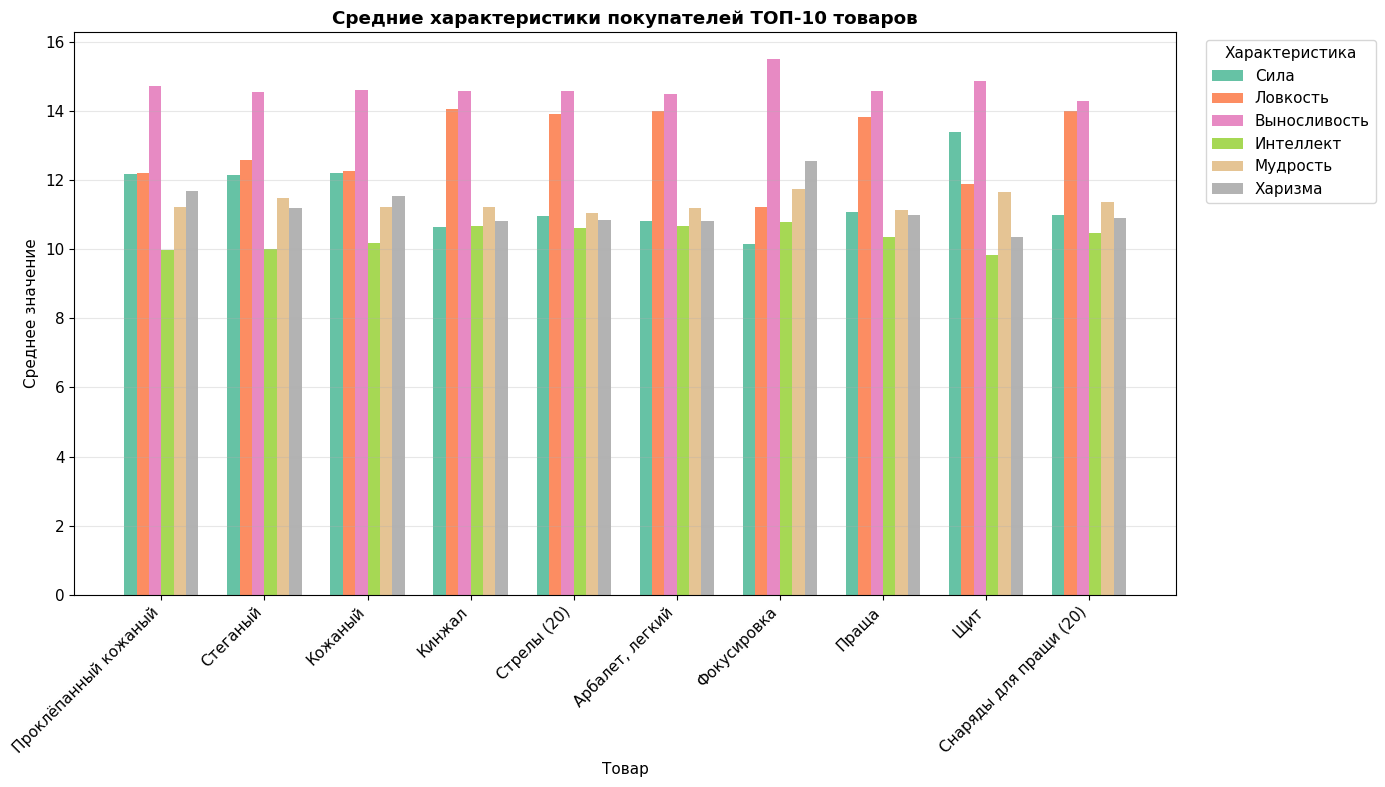

In [41]:
# Этап 6.1 - ANOVA тест (про нулевую гипотезу)

print("📈 ANOVA тест: Различия характеристик между товарами\n")
print("H0: Средние характеристики одинаковы для всех товаров")
print("H1: Есть значимые различия\n")

for col in numeric_cols:
    groups = [group[col].values for name, group in df.groupby('Предмет')]
    f_stat, p_value = f_oneway(*groups)
    result = " Отвергаем H0" if p_value < 0.05 else "❌ Не отвергаем H0"
    print(f"  {col}: F={f_stat:.2f}, p={p_value:.4f} → {result}")



# Дополнительно - Столбчатая диаграмма
mean_top10 = df.groupby('Предмет')[numeric_cols].mean().loc[product_counts.head(10).index]

fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(mean_top10))
width = 0.12
colors = plt.cm.Set2(np.linspace(0, 1, len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    ax.bar(x + i*width, mean_top10[col], width, label=col, color=colors[i])

ax.set_xlabel('Товар')
ax.set_ylabel('Среднее значение')
ax.set_title('Средние характеристики покупателей ТОП-10 товаров', fontweight='bold')
ax.set_xticks(x + width * 2.5)
ax.set_xticklabels(mean_top10.index, rotation=45, ha='right')
ax.legend(title='Характеристика', bbox_to_anchor=(1.02, 1))
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Этап 6.2 - Выводы по проверке гипотез (ANOVA):

**Гипотеза:** H₀ — средние характеристики одинаковы для всех товаров

| Характеристика | F-статистика | p-value | Решение |
|----------------|--------------|---------|---------|
| Сила | 42.44 | <0.0001 | Отвергаем H₀ |
| Ловкость | 18.06 | <0.0001 | Отвергаем H₀ |
| Выносливость | 3.67 | <0.0001 | Отвергаем H₀ |
| Интеллект | 9.66 | <0.0001 | Отвергаем H₀ |
| Мудрость | 7.68 | <0.0001 | Отвергаем H₀ |
| Харизма | 9.08 | <0.0001 | Отвергаем H₀ |

**Вывод:** Для всех характеристик обнаружены статистически значимые различия между группами товаров (p < 0.05). Это подтверждает, что клиенты с разными характеристиками предпочитают разные товары.

**Наблюдения из графиков:**
- Покупатели Фокусировки имеют низкую Силу и высокую Выносливость
- Покупатели Кинжала — высокую Ловкость и Интеллект
- Покупатели Проклёпанного кожаного — сбалансированные характеристики

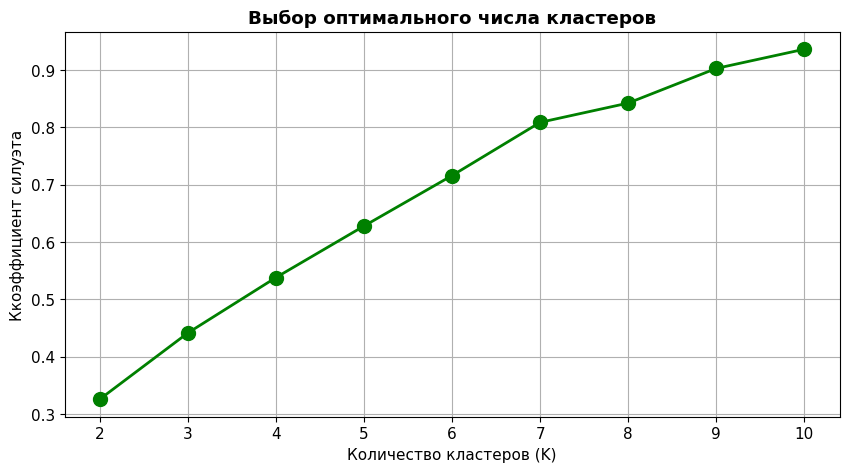


 Оптимальное число кластеров: 10
 коэффициент силуэта: 0.936


In [42]:
# Этап 7.1 - Кластерный анализ

customer_data = df.groupby('Имя')[numeric_cols].mean().reset_index()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data[numeric_cols])

silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(list(K_range), silhouettes, 'go-', linewidth=2, markersize=10)
ax.set_xlabel('Количество кластеров (K)')
ax.set_ylabel('Ккоэффициент силуэта')
ax.set_title('Выбор оптимального числа кластеров', fontweight='bold')
ax.grid(True)
plt.show()

optimal_k = list(K_range)[np.argmax(silhouettes)]
print(f"\n Оптимальное число кластеров: {optimal_k}")
print(f" коэффициент силуэта: {max(silhouettes):.3f}")

### Этап 7.2 - Выводы по выбору числа кластеров:

| K | Инерция | Силуэт | Комментарий |
|---|---------|--------|-------------|
| 2 | 20064 | 0.326 | Слишком грубо |
| 3 | 14495 | 0.441 | Недостаточно |
| 4 | 10612 | 0.538 | Приемлемо |
| 5 | 7009 | 0.628 | Хорошо |
| 6 | 4317 | 0.716 | Очень хорошо |
| 7 | 2694 | 0.809 | Отлично |
| 8 | 1827 | 0.842 | Отлично |
| 9 | 1142 | 0.903 | Превосходно |
| **10** | **664** | **0.936** | **Оптимально** |

**Выбор:** K = 10 кластеров (максимальный силуэтный коэффициент = 0.936)

Силуэтный коэффициент > 0.7 считается хорошим результатом, а > 0.9 — отличным.

 Сегменты:



,Сила,Ловкость,Выносливость,Интеллект,Мудрость,Харизма
Сегмент,,,,,,
0,10.0,16.0,12.0,12.0,12.0,10.0
1,16.0,8.0,16.0,8.0,8.0,16.0
2,14.0,14.0,14.0,10.0,10.0,10.0
3,10.0,10.0,16.0,10.0,16.0,10.0
4,9.5,12.0,14.5,16.0,10.0,10.0
5,16.0,16.0,16.0,8.0,8.0,8.0
6,9.6,12.8,15.2,9.2,9.3,16.0
7,12.0,14.0,12.0,10.0,16.0,8.0
8,14.0,8.0,16.0,8.0,16.0,10.0



 Размеры сегментов:
  Сегмент 0: 250 клиентов (5.3%)
  Сегмент 1: 654 клиентов (13.9%)
  Сегмент 2: 755 клиентов (16.1%)
  Сегмент 3: 270 клиентов (5.8%)
  Сегмент 4: 398 клиентов (8.5%)
  Сегмент 5: 766 клиентов (16.3%)
  Сегмент 6: 517 клиентов (11.0%)
  Сегмент 7: 659 клиентов (14.1%)
  Сегмент 8: 312 клиентов (6.7%)
  Сегмент 9: 109 клиентов (2.3%)


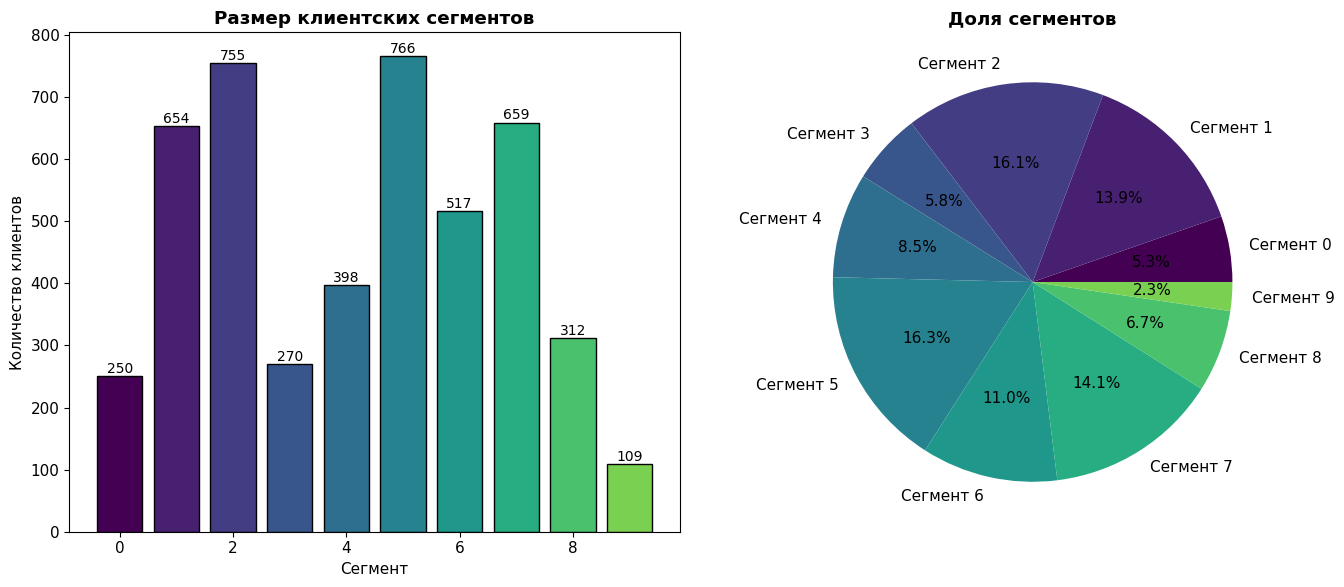

https://clck.ru/3Qh9yf


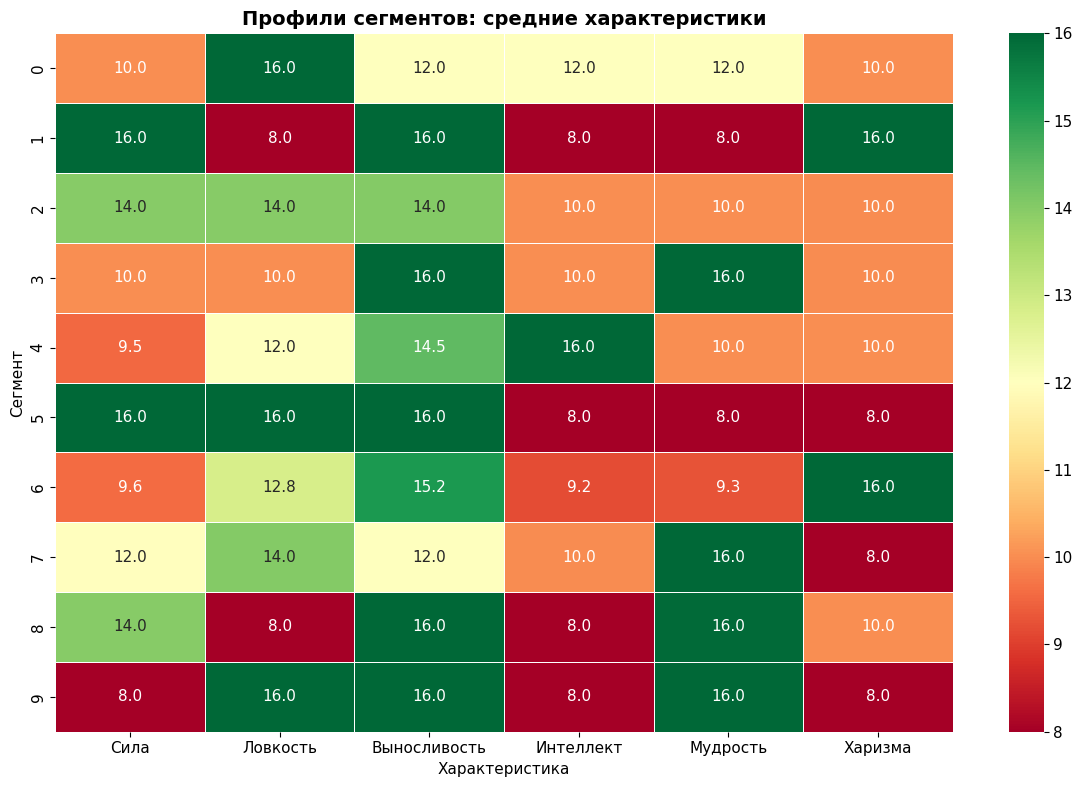

In [43]:
# Этап 8.1 - Определяем сегменты

# Для повторного запуска чистим сегмент
if 'Сегмент' in df.columns:
    df = df.drop(columns=['Сегмент'])

segments = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_data['Сегмент'] = segments.fit_predict(X_scaled)
df = df.merge(customer_data[['Имя', 'Сегмент']], on='Имя', how='left')

print(" Сегменты:\n")
segment_means = customer_data.groupby('Сегмент')[numeric_cols].mean()
display(segment_means.round(1))

print("\n Размеры сегментов:")
for seg in sorted(customer_data['Сегмент'].unique()):
    size = (customer_data['Сегмент'] == seg).sum()
    print(f"  Сегмент {seg}: {size} клиентов ({size/len(customer_data)*100:.1f}%)")



# Визуал 1 - размеры сегментов
segment_sizes = customer_data['Сегмент'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = plt.cm.viridis(np.linspace(0, 0.8, len(segment_sizes)))
bars = axes[0].bar(segment_sizes.index, segment_sizes.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Сегмент')
axes[0].set_ylabel('Количество клиентов')
axes[0].set_title('Размер клиентских сегментов', fontweight='bold')
for bar, val in zip(bars, segment_sizes.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                 str(val), ha='center', fontsize=10)

axes[1].pie(segment_sizes.values, labels=[f'Сегмент {i}' for i in segment_sizes.index],
            autopct='%1.1f%%', colors=colors)
axes[1].set_title('Доля сегментов', fontweight='bold')

plt.tight_layout()
plt.show()

print("https://clck.ru/3Qh9yf")

# Визуал 2 - Heatmap профилей
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(segment_means, annot=True, cmap='RdYlGn', fmt='.1f',
            linewidths=0.5, center=segment_means.values.mean())
ax.set_title('Профили сегментов: средние характеристики', fontweight='bold', fontsize=14)
ax.set_xlabel('Характеристика')
ax.set_ylabel('Сегмент')
plt.tight_layout()
plt.show()

### Этап 8.2 - Выводы по сегментам:

**Качество кластеризации:** Силуэт = 0.936 (успех)

| Сегмент | Клиентов | Доля | Сила | Ловк | Вынос | Интел | Мудр | Хариз | Название |
|---------|----------|------|------|------|-------|-------|------|-------|----------|
| 0 | 250 | 5.3% | 10 | **16** | 12 | **12** | 12 | 10 | Ловкие интеллектуалы |
| 1 | 654 | 13.9% | **16** | 8 | **16** | 8 | 8 | **16** | Харизматичные воины |
| 2 | 755 | 16.1% | 14 | 14 | 14 | 10 | 10 | 10 | Универсалы |
| 3 | 270 | 5.8% | 10 | 10 | **16** | 10 | **16** | 10 | Мудрые выносливые |
| 4 | 398 | 8.5% | 9.5 | 12 | 14.5 | **16** | 10 | 10 | Интеллектуалы |
| 5 | 766 | 16.3% | **16** | **16** | **16** | 8 | 8 | 8 | Физически развитые |
| 6 | 517 | 11.0% | 9.6 | 12.8 | 15.2 | 9.2 | 9.3 | **16** | Харизматики |
| 7 | 659 | 14.1% | 12 | **14** | 12 | 10 | **16** | 8 | Мудрые ловкачи |
| 8 | 312 | 6.7% | 14 | 8 | **16** | 8 | **16** | 10 | Сильные мудрецы |
| 9 | 109 | 2.3% | 8 | **16** | **16** | 8 | **16** | 8 | Ловкие мудрецы |

**Крупнейшие сегменты:** 5 (16.3%), 2 (16.1%), 7 (14.1%), 1 (13.9%)
**Наименьший сегмент:** 9 (2.3%) — нишевая группа ловких мудрецов

X^2 тест: χ^2 = 3985.61, p = 0.0000
Есть значимая связь между сегментом и выбором товара

 Топ-3 товара по сегментам:

  Сегмент 0:
    • Кинжал: 26
    • Снаряды для пращи (20): 23
    • Арбалет, легкий: 22

  Сегмент 1:
    • Ручной топор: 26
    • Щит: 25
    • Глефа: 25

  Сегмент 2:
    • Кольчужная рубаха: 25
    • Боевая кирка: 24
    • Секира: 22

  Сегмент 3:
    • Стеганый: 28
    • Фокусировка: 24
    • Чешуйчатый: 22

  Сегмент 4:
    • Фокусировка: 37
    • Арбалет, легкий: 27
    • Кинжал: 27

  Сегмент 5:
    • Ручной топор: 27
    • Кнут: 26
    • Духовая трубка: 26

  Сегмент 6:
    • Фокусировка: 67
    • Проклёпанный кожаный: 45
    • Стрелы (20): 41

  Сегмент 7:
    • Шкурный: 26
    • Арбалет, тяжелый: 26
    • Чешуйчатый: 23

  Сегмент 8:
    • Фокусировка: 29
    • Полулаты: 25
    • Шкурный: 24

  Сегмент 9:
    • Короткий лук: 21
    • Кинжал: 20
    • Арбалет, легкий: 17


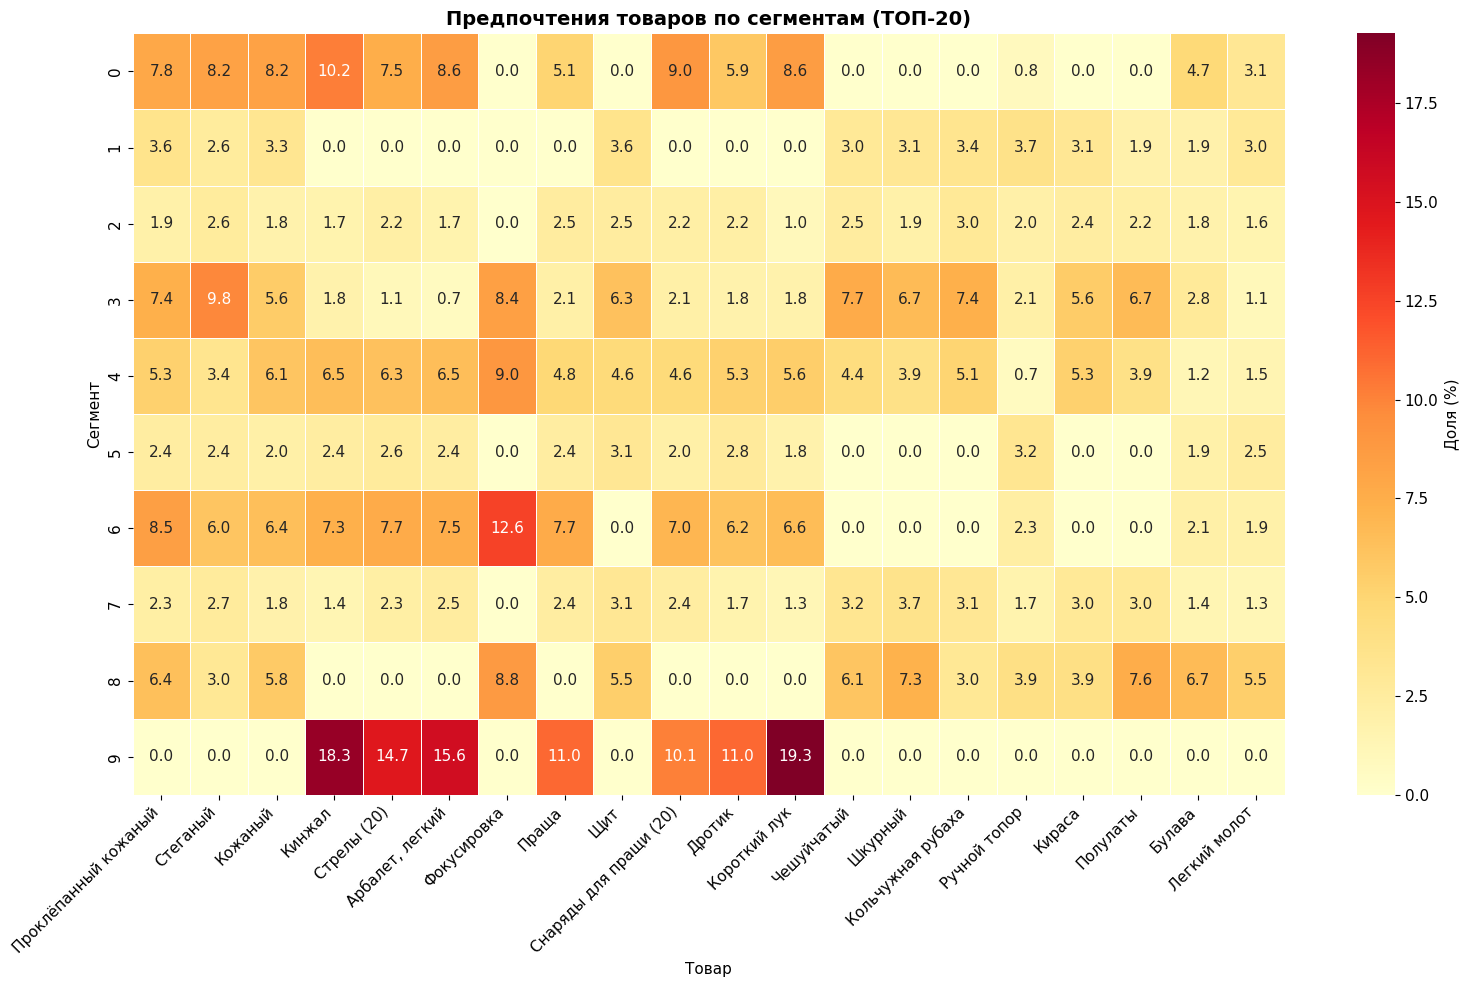

In [44]:
# Этап 9.1 Товары по сегментам

crosstab = pd.crosstab(df['Сегмент'], df['Предмет'])
crosstab_pct = pd.crosstab(df['Сегмент'], df['Предмет'], normalize='index') * 100

chi2, p_value, dof, expected = chi2_contingency(crosstab)
print(f"X^2 тест: χ^2 = {chi2:.2f}, p = {p_value:.4f}")
print(f"{'Есть значимая связь между сегментом и выбором товара' if p_value < 0.05 else 'Связи нет'}")

print("\n Топ-3 товара по сегментам:")
for seg in sorted(df['Сегмент'].unique()):
    products = df[df['Сегмент'] == seg]['Предмет'].value_counts().head(3)
    print(f"\n  Сегмент {seg}:")
    for prod, cnt in products.items():
        print(f"    • {prod}: {cnt}")

# Визуал - тепловая карта
top20_products = product_counts.head(20).index.tolist()
crosstab_top20 = crosstab_pct[top20_products]

fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(crosstab_top20, annot=True, cmap='YlOrRd', fmt='.1f',
            linewidths=0.5, cbar_kws={'label': 'Доля (%)'})
ax.set_title('Предпочтения товаров по сегментам (ТОП-20)', fontweight='bold', fontsize=14)
ax.set_xlabel('Товар')
ax.set_ylabel('Сегмент')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Этап 9.2 - Выводы по товарным предпочтениям сегментов:

**Хи-квадрат тест:** χ² = 3985.61, p < 0.0001
**Вывод:** есть статистически значимая связь между сегментом и выбором товара

| Сегмент | Профиль | ТОП-1 товар | ТОП-2 | ТОП-3 |
|---------|---------|-------------|-------|-------|
| 0 | Ловкие интеллектуалы | Кинжал (10.2%) | Снаряды для пращи | Арбалет легкий |
| 1 | Харизматичные воины | Ручной топор (3.7%) | Щит | Глефа |
| 2 | Универсалы | Кольчужная рубаха (3.0%) | Боевая кирка | Секира |
| 3 | Мудрые выносливые | Стеганый (9.8%) | Фокусировка | Чешуйчатый |
| 4 | Интеллектуалы | Фокусировка (9.0%) | Арбалет легкий | Кинжал |
| 5 | Физически развитые | Ручной топор (3.2%) | Кнут | Духовая трубка |
| 6 | Харизматики | **Фокусировка (12.6%)** | Проклёпанный кожаный | Стрелы |
| 7 | Мудрые ловкачи | Шкурный (3.7%) | Арбалет тяжёлый | Чешуйчатый |
| 8 | Сильные мудрецы | Фокусировка (8.8%) | Полулаты | Шкурный |
| 9 | Ловкие мудрецы | **Короткий лук (19.3%)** | Кинжал | Арбалет легкий |

**Ключевые наблюдения:**
- **Фокусировка** — хит у сегментов с высокой Харизмой/Мудростью (3, 4, 6, 8)
- **Дальнобойное оружие** (луки, арбалеты) — у ловких сегментов (0, 9)
- **Тяжёлое оружие** (топоры, глефы) — у сильных сегментов (1, 5)
- **Лёгкие доспехи** — универсально популярны